In [ ]:
#load pip libraries
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import skmultiflow as sci_flow
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential
from datetime import datetime
import time
import os

#load custom libraries
from funcs.IoTDevice import IoTDevice
import funcs.generate_state_data as generate_state_data

In [ ]:

json_folder_path = "../json_folder/device_info"
synth_device_config = "../json_folder/synth_device_gen.json"

# load the amount of devices to be generated
with open(synth_device_config, 'r') as file:
    device_count = json.load(file)


dfs_dict = {}
combined_df_dict = {}

for filename in os.listdir(json_folder_path):
    if filename.endswith(".json") and "template" not in filename.lower():
        json_path = os.path.join(json_folder_path, filename)
        print(f"Loading JSON file: {json_path}")

        device = IoTDevice()
        device.load_json(json_path)
        dfs, combined_df = generate_state_data.device_data_generation(device)
        dfs_dict[filename] = dfs
        combined_df_dict[filename] = combined_df


# #single device testing
# test_temp_device = IoTDevice()
# test_json_path = "../json_folder/config_template.json"
# test_temp_device.load_json(test_json_path)
# run_state = test_temp_device.get_synthesis_parameter("mode")
# dfs, combined_df = generate_state_data.device_data_generation(test_temp_device)




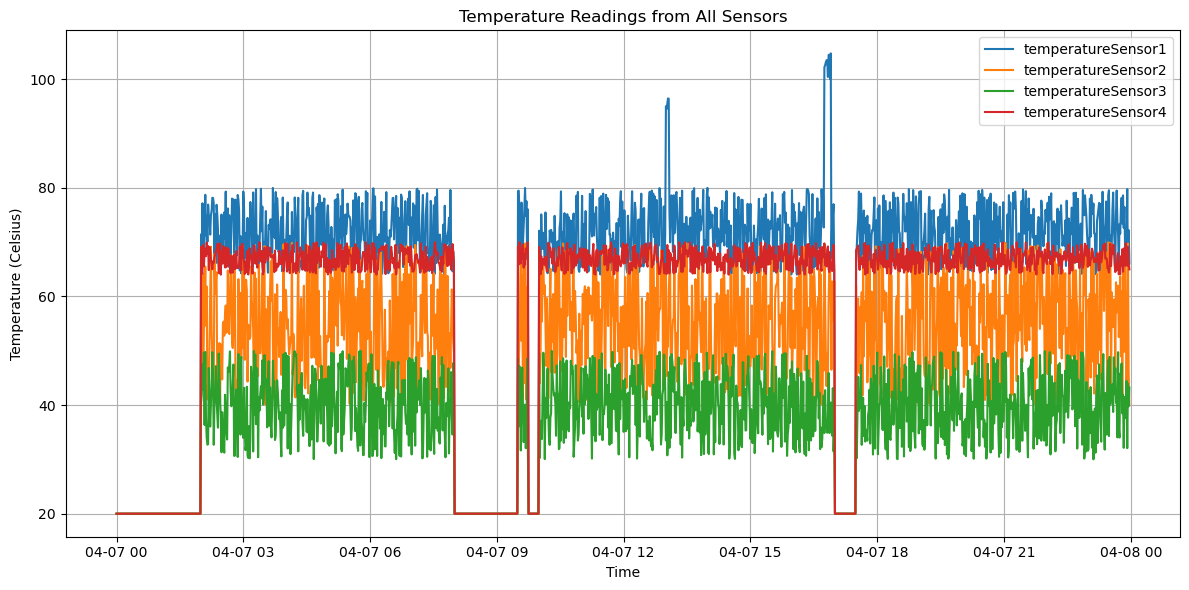

✅ Exported to test_temp.csv


In [4]:
#for switching between batch and stream mode, change the "mode" under "synth_detial" in the json file

# the batch mode
if (test_temp_device.get_synthesis_parameter("mode") == "batch"):
    plt.figure(figsize=(12, 6))

    for df in dfs:
        sensor_name = df["sensor"].iloc[0] if "sensor" in df else "Unknown Sensor"
        plt.plot(df['timestamp'].to_numpy(), df['feature_0'].to_numpy(), label=sensor_name)

    plt.title("Temperature Readings from All Sensors")
    plt.xlabel("Time")
    plt.ylabel("Temperature (Celsius)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 5. Export to CSV
    combined_df.to_csv("test_temp.csv", index=False)

    print("✅ Exported to test_temp.csv")

# the stream mode
# will send the data one at a time
elif (test_temp_device.get_synthesis_parameter("mode") == "stream"):
    stream_length = min(len(df) for df in dfs)  # assume same length

    for i in range(stream_length):
        for df in dfs:
            print(df.iloc[i].to_dict())
        time.sleep(1)  # Simulate one batch per second (1 row per sensor)